This is the code I used to analyze 538 Star Wars Survey data in order to write my article title "Fandom, Identity and how to “Save” the Star Trek franchise". Thanks for taking the time to look at it. If you have any questions please find me through my website.

muzi-storm.com

-- Paul Storm

### Importing the data

Here I simply begin by importing all the packages I will need to clean up and analyze the data. I also changed the plot font to Time New Roman because I prefer the look of it.  Finally, I import the survey data into a Pandas data frame.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

plt.rcParams["font.family"] = "Times New Roman"

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

### Cleaning up the data

First I want to remove all rows where the Respondent ID is null because we can be sure if the data contained in these rows is authentic or not.

In [2]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]

Additionally, I want to make sure the rankings of the Star Wars films is authentic. Therefore if you didn't watch one of the films your ranking for that film is not counted. Accordingly, I went through each respondent and if they said they had not watched one of the Star Wars films I deleted their ranking of that film if they had given one. 

In [3]:
for i in range(len(star_wars)):
    index = i
    for i in range(6):
        if star_wars.iloc[index, i + 3] == False:
            star_wars.iloc[index, i + 9] = np.nan

#### Cleaning up the columns:

Now I want to look at all the columns in the data set to see which ones could use some re-organizing. I am going to look for columns that have ambiguous or confusing names.

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Which Star Wars films have you seen?:

First I want to clean up the columns describing which of the Star Wars films a respondent has seen. I am going to take a look at the data contained within these columns to see exactly what changes need to be made.

In [5]:
print(star_wars.iloc[:10,3:8])


   Which of the following Star Wars films have you seen? Please select all that apply.  \
1            Star Wars: Episode I  The Phantom Menace                                    
2                                                 NaN                                    
3            Star Wars: Episode I  The Phantom Menace                                    
4            Star Wars: Episode I  The Phantom Menace                                    
5            Star Wars: Episode I  The Phantom Menace                                    
6            Star Wars: Episode I  The Phantom Menace                                    
7            Star Wars: Episode I  The Phantom Menace                                    
8            Star Wars: Episode I  The Phantom Menace                                    
9            Star Wars: Episode I  The Phantom Menace                                    
10                                                NaN                                    

         

We can see the first column is labelled with the question "Which of the following Star Wars films have you seen? Please select all that apply" and then the next five columns are simply unnamed. Each of these columns refers to one of the Star Wars films, if a respondent has seen the film then the name of that film is written into the column corresponding to that film.  So a row in column "Unamed: 4" contains "Attack of the Clones" if the respondent has viewed Attack of the Clones. Presumably this is the way the software used to conduct the survey automatically exported the data, but it is not very easy to read. 

I would like to rename each column simply as "seen_epi_x" with x being the number of the film within the Star Wars series. Additionally, the values in the columns will be changed to True if the respondent has seen the film and False if the respondent has not. 

In [6]:
episode_names = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for i in range(3,9):
    star_wars.iloc[:,i] = star_wars.iloc[:,i].map(episode_names)
    star_wars.iloc[:,i] = star_wars.iloc[:,i].fillna(value=False)
    
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_epi_1",
    "Unnamed: 4": "seen_epi_2",
    "Unnamed: 5": "seen_epi_3",
    "Unnamed: 6": "seen_epi_4",
    "Unnamed: 7": "seen_epi_5",
    "Unnamed: 8": "seen_epi_6"
})
    

In [7]:
print(star_wars.iloc[:10,3:9])

    seen_epi_1  seen_epi_2  seen_epi_3  seen_epi_4  seen_epi_5  seen_epi_6
1         True        True        True        True        True        True
2        False       False       False       False       False       False
3         True        True        True       False       False       False
4         True        True        True        True        True        True
5         True        True        True        True        True        True
6         True        True        True        True        True        True
7         True        True        True        True        True        True
8         True        True        True        True        True        True
9         True        True        True        True        True        True
10       False        True       False       False       False       False


These column names and values are both much more compact (which makes them easier to take in at a glance) and also do a better job of telling us eactly what is in each column

Please state your view  of the following characters:

538 also included a question regarding the respondants view of 14 of Star Wars' most famous characters. So let's take a look at those columns and the values they contain.

In [8]:
print(star_wars.loc[:10,'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Unnamed: 28'])

   Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.  \
1                                      Very favorably                                                               
2                                                 NaN                                                               
3                                  Somewhat favorably                                                               
4                                      Very favorably                                                               
5                                      Very favorably                                                               
6                                      Very favorably                                                               
7                                      Very favorably                                                               
8                                      Very favorably           

Unfortunately, this data is totally unreadable because, like the columns regarding which Star Films a viewer had seen, the columns are  unnamed but this time the rows contain no information regarding who is being referred to in each particular column.  So there is no way to tell which column refers to which character. Additionally, 538 did not include this information when they upload the data to github. Fortunately, there is one way for us to figure out who is referred to in each column.  538 included a graph showing the overall favorability of each character in the survey. By first calculating the favorability score of each column we can then reference the graph to find out who the column refers to. 

[Here](https://fivethirtyeight.com/wp-content/uploads/2014/07/hickey-datalab-starwars-41.png?w=575) is a link to the chart.

In [9]:
for i in range(14):
    col = i + 15
    print(star_wars.iloc[:0,col].name)
    print((len(star_wars[star_wars.iloc[:,col] == 'Very favorably']) + len(star_wars[star_wars.iloc[:,col] == 'Somewhat favorably']))/star_wars.iloc[:,col].count())
    print(len(star_wars[star_wars.iloc[:,col] == "Neither favorably nor unfavorably (neutral)"])/star_wars.iloc[:,col].count())
    print((len(star_wars[star_wars.iloc[:,col] == 'Very unfavorably']) + len(star_wars[star_wars.iloc[:,col] == 'Somewhat unfavorably']))/star_wars.iloc[:,col].count())
    print(len(star_wars[star_wars.iloc[:,col] == "Unfamiliar (N/A)"])/star_wars.iloc[:,col].count())
    print('\n')

Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.
0.9179734620024126
0.05307599517490953
0.010856453558504222
0.018094089264173704


Unnamed: 16
0.927797833935018
0.0457280385078219
0.019253910950661854
0.007220216606498195


Unnamed: 17
0.910950661853189
0.05776173285198556
0.021660649819494584
0.009626955475330927


Unnamed: 18
0.6245443499392467
0.16403402187120292
0.14823815309842042
0.06318347509113001


Unnamed: 19
0.9090909090909091
0.052121212121212124
0.01818181818181818
0.020606060606060607


Unnamed: 20
0.3108108108108108
0.2616707616707617
0.23587223587223588
0.19164619164619165


Unnamed: 21
0.5823244552058111
0.1016949152542373
0.30387409200968524
0.012106537530266344


Unnamed: 22
0.4451219512195122
0.28780487804878047
0.08658536585365853
0.18048780487804877


Unnamed: 23
0.3583743842364532
0.3054187192118227
0.17364532019704434
0.1625615763546798


Unnamed: 24
0.8500604594921403
0.09552599758162031
0.036275695

Here I simply go through each column and print out the the column name and the favorability score.  This is easily matched with the graph in the article and below I change the column name so it now contains the name of chaaracter being referred to. 

In [10]:
star_wars = star_wars.rename(columns={"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.":"view_Han_Solo",
    'Unnamed: 16':"view_Luke_Skywalker",
    'Unnamed: 17':"view_Princess_Leia",
    'Unnamed: 18':'view_Anakin_Skywalker',
    'Unnamed: 19':"view_Obi_Wan_Kenobi",
    'Unnamed: 20':"view_Emperor_Palpatine",
    'Unnamed: 21':"view_Darth_Vader",
    'Unnamed: 22':"view_Lando_Calrissian",
    'Unnamed: 23':"view_Boba_Fett",
    'Unnamed: 24':"view_C-3P0",
    'Unnamed: 25':"view_R2-D2",
    'Unnamed: 26':"view_Jar_Jar_Binks",
    'Unnamed: 27':"view_Padme_Amidala",
    'Unnamed: 28':"view_Yoda"})

for i in range(14):
    col = i + 15
    star_wars.iloc[:,col] = star_wars.iloc[:,col].replace("Neither favorably nor unfavorably (neutral)", "Neutral")
    star_wars.iloc[:,col] = star_wars.iloc[:,col].replace("Unfamiliar (N/A)", "Unfamiliar")


print(star_wars.loc[:5,"view_Han_Solo":"view_Yoda"])


        view_Han_Solo view_Luke_Skywalker  view_Princess_Leia  \
1      Very favorably      Very favorably      Very favorably   
2                 NaN                 NaN                 NaN   
3  Somewhat favorably  Somewhat favorably  Somewhat favorably   
4      Very favorably      Very favorably      Very favorably   
5      Very favorably  Somewhat favorably  Somewhat favorably   

  view_Anakin_Skywalker view_Obi_Wan_Kenobi view_Emperor_Palpatine  \
1        Very favorably      Very favorably         Very favorably   
2                   NaN                 NaN                    NaN   
3    Somewhat favorably  Somewhat favorably             Unfamiliar   
4        Very favorably      Very favorably     Somewhat favorably   
5  Somewhat unfavorably      Very favorably       Very unfavorably   

     view_Darth_Vader view_Lando_Calrissian        view_Boba_Fett  \
1      Very favorably            Unfamiliar            Unfamiliar   
2                 NaN                   NaN       

I also changed the response type "Neither favorably nor unfavorably (neutral)" to "Neutral" because there is no significant difference in meaning and the later is much shorter. I also changed "Unfamiliar (N/A)" to "Unfamiliar" for the same reason. 538 also made these change on the graph featured in their article about the data. 

Once again we can see that these columns are much easier to read and understand than they were before I made these changes. 

Film rankings:

We can use a similar process to clean up the coloumns that hold respondents ranking of each film in the Star Wars franchise. First let's look at the columns themselves.

In [11]:
star_wars.iloc[:10,9:15]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3
6,1,4,3,6,5,2
7,6,5,4,3,1,2
8,4,5,6,3,2,1
9,5,4,6,2,1,3
10,1,2,3,4,5,6


We can see that these columns also don't tell us exactly what they refer to either. I am pretty sure that each column is hold respondents ranking of one of the franchise six films and they are listed from Episode I to Episode VI but just make sure I will look at counts of each rank in each column. I know that Episode V got the most first place votes and Episode II got the least from the 538 article about the survey.

In [12]:
print(star_wars.iloc[:,9].value_counts())
print(star_wars.iloc[:,10].value_counts())
print(star_wars.iloc[:,11].value_counts())
print(star_wars.iloc[:,12].value_counts())
print(star_wars.iloc[:,13].value_counts())
print(star_wars.iloc[:,14].value_counts())

4    237
6    168
3    130
1    129
5    100
2     71
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: int64
5    300
4    183
2    116
3    103
6    102
1     32
Name: Unnamed: 10, dtype: int64
6    217
5    203
4    182
3    150
2     47
1     36
Name: Unnamed: 11, dtype: int64
1    204
6    161
2    135
4    130
3    127
5     79
Name: Unnamed: 12, dtype: int64
1    289
2    235
5    118
3    106
4     47
6     41
Name: Unnamed: 13, dtype: int64
2    232
3    220
1    146
6    145
4     57
5     36
Name: Unnamed: 14, dtype: int64


My suspicions confirmed I will go ahead and rename the columns accordingly.

In [13]:
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'rank_epi_1',
    'Unnamed: 10':'rank_epi_2',
    'Unnamed: 11':'rank_epi_3',
    'Unnamed: 12':'rank_epi_4',
    'Unnamed: 13':'rank_epi_5',
    'Unnamed: 14':'rank_epi_6',
})

I am not exactly sure what happened to cause this error, but I am going to remove the extra characters from the column asking about the extended universe.

In [14]:
star_wars = star_wars.rename(columns={'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦':'Do you consider yourself to be a fan of the Expanded Universe?'})


With these changes made I feel that the data is both much easier to read and understand but also more reliable. I am ready to start actually explore the data itself.

### Data bias

I want to explore whether early generalizations about people who watched the Original Star Trek series are also true about Star Trek fans in 2015. These generalizations are about the gender, income and education level of individuals who watch Star Trek. The first thing I want to know is whether respondents the 538 survey data have a similar demographic makeup to the US population as a whole in these three categories. I will compare the number of men and women, and the distributions of education level and income in the 538 survey with a few sources from the US government.

But first I want to make sure that the individuals responding to the survey are actually from the US. Otherwise data about the US population won't be very helpful.

In [15]:
star_wars["Location (Census Region)"].value_counts()

East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64

It seems everyone is in fact from the US. The article is title "America's 'Star Wars' Movies (And Least Favorite Characters)" so I assume SurveyMonkey uses IP Addresses to make sure that only those located in the US can respond to the survey.

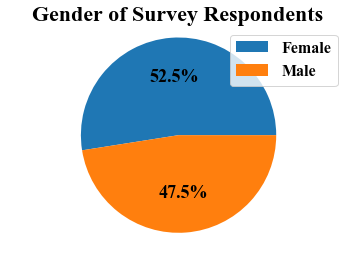

In [16]:
female = star_wars[star_wars["Gender"] == "Female"]
male = star_wars[star_wars["Gender"] == "Male"]

female_count = len(female)
male_count = len(male)
gender_counts = [female_count, male_count]
labels = ["Female", "Male"]

wedges, texts, autotexts = plt.pie(
                            gender_counts,
                            autopct='%1.1f%%'
                            )

plt.axis("equal")
plt.title("Gender of Survey Respondents", fontsize=22)
plt.legend(labels,fontsize=16)
plt.setp(autotexts,size=18)

plt.show()

The data is pretty balanced in terms of gender, although slightly more imbalanced than the US as a whole in [2015](https://www.statista.com/statistics/737923/us-population-by-gender/) it's not too far off.

Next I want to look at educational attainment in the 538 survey and compare it with the US population in general. The Census Bureau released [this](https://www.census.gov/content/dam/Census/library/publications/2016/demo/p20-578.pdf) data regarding educational attainment in 2015. One thing to note is the the Census Bureau data is only for individuals above the age of 25 while the age range in the 538 goes all the way to 18.

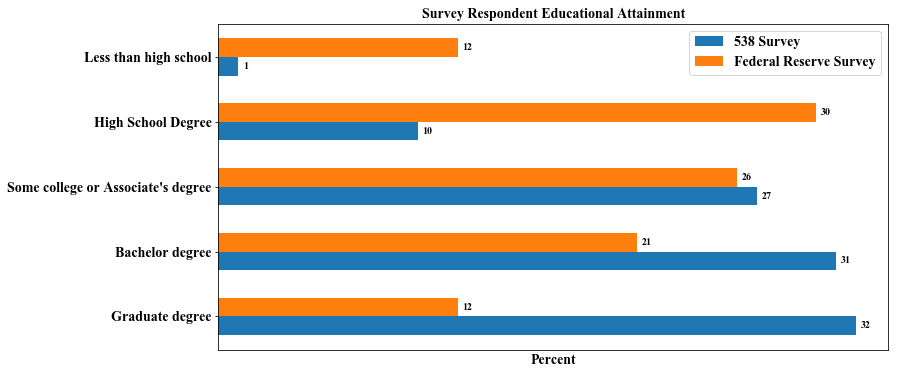

In [17]:
survey = star_wars["Education"].value_counts(normalize=True).tolist()
survey = [round(a*100,0) for a in survey]
fr_survey = list((12,21,26,30,12))

educational_attainment = ['Graduate degree','Bachelor degree',"Some college or Associate's degree",'High School Degree','Less than high school']

pos = [(a*7) + 1 for a in range(5)]
pos2 = [(a*7) + 3 for a in range(5)]
tick_pos = [(a*7) + 2 for a in range(5)]

h = 2

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.barh(pos,survey,height=h)
rects2 = ax.barh(pos2,fr_survey,height=h)

ax.set_yticks(tick_pos)
ax.set_xticks([])
ax.set_yticklabels(educational_attainment,fontsize=14)
ax.set_xlabel("Percent",fontsize=14)
ax.set_title("Survey Respondent Educational Attainment",fontsize=14)
ax.tick_params(axis='both',which='both',bottom=False)
ax.legend(('538 Survey',"Federal Reserve Survey"),fontsize=14)

rects = [rects1,rects2]

for rect in rects:
        for i in range(len(rect)):
            width = int(rect[i].get_width())
            xloc = 5
            clr = 'black'
            align = 'left'
            yloc = rect[i].get_y() + rect[i].get_height() / 2
            ax.annotate(width, xy=(width, yloc), xytext=(xloc, 0),
                            textcoords="offset points",
                            ha=align, va='center',
                            color=clr, weight='bold', clip_on=True)


def autolabel(rects,ypos='center'):
    
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        width = rect.get_width()
        ax.annotate('{}'.format(round(width,2)),
                    xy=(rect.get_y() + rect.get_height() / 2, width),
                    xytext=(offset[ypos]*3, 3),
                    textcoords="offset points",  
                    ha=ha[ypos], va='bottom',
                    fontsize=12)


plt.show()

This chart seems to indicate that there is quite a significant amount of bias in the 538 data. Respondents to the 538 survey are much more highly educated than in the population in general. In the US population there are similar percentages of people with only a highschool degree and those with graduate degrees, in the 538 data there is thirty-two times more people with graduate degrees. This evening more surprising when we consider the fact that the Census data doesn't consider anyone under the age of 25.  While the percentage of 18-25 with graduate degrees is not zero but it probably is not very high either. This is something to keep in mind when we are looking at 538's data, especially summaries of the entire survey. However, we still have 112 respondents with a high school degree or less as their highest level of educational attainment which should be enough to give us some insight into the demographic as a whole.

Next I wanted to do the same thing for income level. I found a survey conducted by the US Federal Reserve in 2015. Comparing to surveys may not be the best way to tell if there is bias in my data but the Federal Reserve's survey is conducted with a little bit more care. Surprisingly, more money was spent investigating "the Economic Well-Being of U.S. Households" than was spent on finding out who thinks Han shot first. In addition to being a more well-crafted survey the Federal Reserve data has the massive benefit of being from the same year as the 538 survey. The survey can be found [here](https://www.federalreserve.gov/econresdata/2016-economic-well-being-of-us-households-in-2015-introduction.htm) and the chart showing income distribution can be found on [this](https://www.federalreserve.gov/econresdata/2016-economic-well-being-of-us-households-in-2015-Income-and-Savings.htm) page.

In [18]:
income = star_wars
income['Household Income'] = income['Household Income'].str.replace('$','')
income['Household Income'] = income['Household Income'].str.replace(',','')
income = income.dropna(subset=['Household Income'])
income = income[income["Household Income"] != 'Response']

income_brackets = ['0 - 24,999','25,000 - 49,999','50,000 - 99,999','100,000 - 149,999','150,000+']

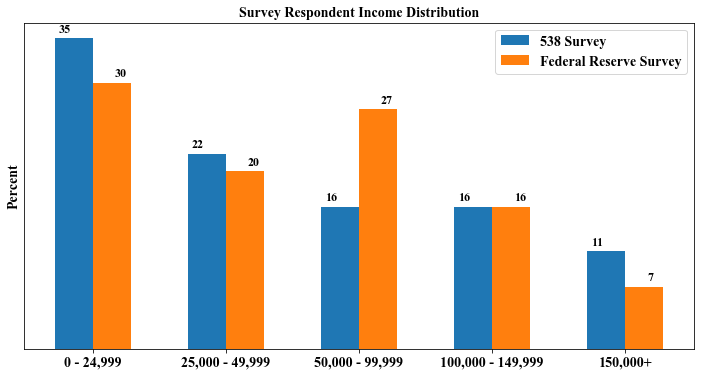

In [19]:
survey = income["Household Income"].value_counts(normalize=True).tolist()
survey = [int(round(a*100,0)) for a in survey]
fr_survey = list((30,20,27,16,7))

pos = [(a*7) + 1 for a in range(5)]
pos2 = [(a*7) + 3 for a in range(5)]
tick_pos = [(a*7) + 2 for a in range(5)]

w = 2

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(pos,survey,width=w)
rects2 = ax.bar(pos2,fr_survey,width=w)

ax.set_xticks(tick_pos)
ax.set_yticks([])
ax.set_xticklabels(income_brackets,fontsize=14)
ax.set_ylabel("Percent",fontsize=14)
ax.set_title("Survey Respondent Income Distribution",fontsize=14)
ax.tick_params(axis='both',which='both',left=False)
ax.legend(('538 Survey',"Federal Reserve Survey"),fontsize=14)

def autolabel(rects,xpos='center'):
    
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),
                    textcoords="offset points",  
                    ha=ha[xpos], va='bottom',
                    fontsize=12)

autolabel(rects1,"left")
autolabel(rects2,"right")


plt.show()

For most of the groups the data is relatively representative. The biggest difference is that the Federal Reserve survey has almost twice as many people in the lowest income bracket. This accords with the level of educational attainment we saw early. It seems that respondents to 538 survey are more educated and wealthier than the population in general. This is a predictable problem for an online survey given that people with computers and interent access are likely to be richer than Americans in general. In fact, the Federal Reserve survey specifically oversampled low-income individuals because "this oversample improves the precision of estimates among the lower-income population".

These biases are something to keep in mind as we explore the data furter. As I mentioned, as long as there are enough respondents for each group we are looking at than the biases does not stop us using the data to draw conclusions. When using the data to draw conclusions about the US population as a whole we would need to be more cautious.

### Charts

Now I am ready to make some graphs that explore my original question which is about the gender, educational and wealth make up of the Star Trek fanbase. I will start by looking at whether people with more than just a High School Degree are more likely to be fans of the franchise.

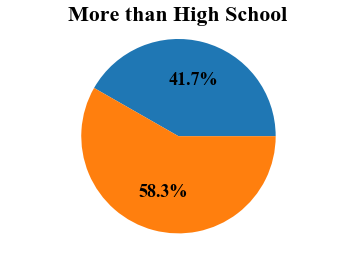

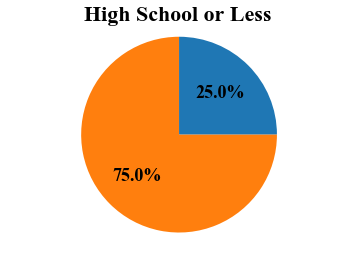

In [20]:
above_high_school = star_wars[(star_wars["Education"] != "High school degree") & (star_wars["Education"] != "Less than high school degree")]
high_school_or_less = star_wars[(star_wars["Education"] == "High school degree") | (star_wars["Education"] == "Less than high school degree")]

above_high_school_fans = above_high_school[above_high_school["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
above_high_school_non_fans = above_high_school[above_high_school["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]
above_high_school_fans_count = len(above_high_school_fans)
above_high_school_non_fans_count = len(above_high_school_non_fans)
above_high_school_fans_non_fans = [above_high_school_fans_count, above_high_school_non_fans_count]
labels = ["Trekkies", "Non-Trekkies"]

wedges, text, autotext = plt.pie(
                            above_high_school_fans_non_fans,
                            autopct="%1.1f%%"
                            )

plt.axis("equal")
plt.title("More than High School",fontsize=22)
plt.setp(autotext,size=18)

plt.show()

high_school_or_less_fans = high_school_or_less[high_school_or_less["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
high_school_or_less_non_fans = high_school_or_less[high_school_or_less["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]
high_school_or_less_fans_count = len(high_school_or_less_fans)
high_school_or_less_non_fans_count = len(high_school_or_less_non_fans)
high_school_or_less_fans_non_fans = [high_school_or_less_fans_count, high_school_or_less_non_fans_count]
labels = ["Trekkies", "Non-Trekkies"]

wedges, text, autotext = plt.pie(
                            high_school_or_less_fans_non_fans,
                            autopct="%1.1f%%"
                            )

plt.axis("equal")
plt.title("High School or Less",fontsize=22)
plt.setp(autotext,size=18)

plt.show()

Another stereotype of fans of science fiction in general and Star Trek specifically is that that they are predominatly male. Again, I wanted to see if this belief was reflected by this survey and if it is, to what extent. 

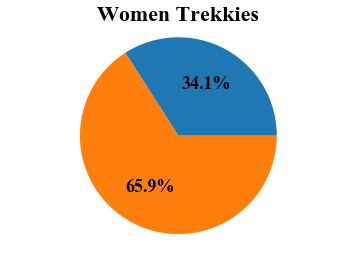

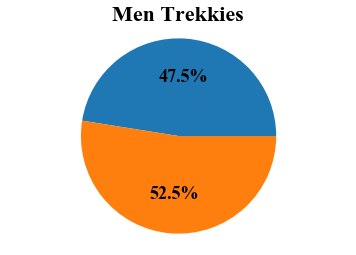

In [21]:
female_trekkies = female[female['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'Yes']
female_non_trekkies = female[female['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'No']
female_trekkies_count = len(female_trekkies)
female_non_trekkies_count = len(female_non_trekkies)
female_trekkies_counts = [female_trekkies_count, female_non_trekkies_count]
labels = ["Trekkies", "Non-Trekkies"]

wedges, text, autotext = plt.pie(
                            female_trekkies_counts,
                            autopct='%1.1f%%'
                            )

plt.axis("equal")
plt.title("Women Trekkies", fontsize=22)
plt.setp(autotext, size=18)

plt.show()

male_trekkies = male[male['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'Yes']
male_non_trekkies = male[male['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'No']
male_trekkies_count = len(male_trekkies)
male_non_trekkies_count = len(male_non_trekkies)
male_trekkies_counts = [male_trekkies_count, male_non_trekkies_count]
labels = ["Trekkies", "Non-Trekkies"]

wedges, text, autotext = plt.pie(
                            male_trekkies_counts,
                            autopct='%1.1f%%'
                            )

plt.axis("equal")
plt.title("Men Trekkies", fontsize=22)
plt.setp(autotext, size=18)

plt.show()


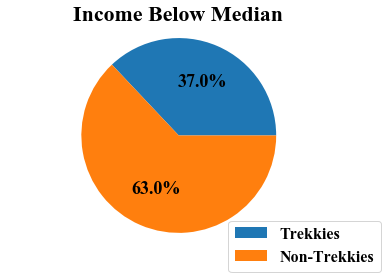

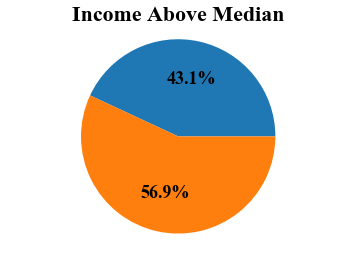

In [22]:
below_median = income[(income['Household Income'] == '0 - 24999') | (income['Household Income'] == '25000 - 49999')]
above_median = income[(income['Household Income'] == '50000 - 99999') | (income['Household Income'] == '100000 - 149999') | (income['Household Income'] == '150000+')]

below_median_fans = below_median[below_median["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
below_median_non_fans = below_median[below_median["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]
below_median_fans_count = len(below_median_fans)
below_median_non_fans_count = len(below_median_non_fans)
below_median = [below_median_fans_count, below_median_non_fans_count]
labels = ["Trekkies", "Non-Trekkies"]

wedges, text, autotext = plt.pie(
                            below_median,
                            autopct="%1.1f%%"
                            )

plt.axis("equal")
plt.title("Income Below Median",fontsize=22)
plt.setp(autotext,size=18)
plt.legend(labels, bbox_to_anchor=(1,0), loc="lower right", bbox_transform=plt.gcf().transFigure, fontsize=16)


plt.show()

above_median_fans = above_median[above_median["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
above_median_non_fans = above_median[above_median["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]
above_median_fans_count = len(above_median_fans)
above_median_non_fans_count = len(above_median_non_fans)
above_median = [above_median_fans_count, above_median_non_fans_count]
labels = ["Trekkies", "Non-Trekkies"]

wedges, text, autotext = plt.pie(
                            above_median,
                            autopct="%1.1f%%"
                            )

plt.axis("equal")
plt.title("Income Above Median",fontsize=22)
plt.setp(autotext,size=18)

plt.show()

Lastly, I wanted to look at the popularity of the two franchises overall. Just to get a sense about their standing in the popular culture. 

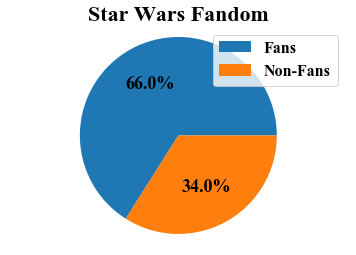

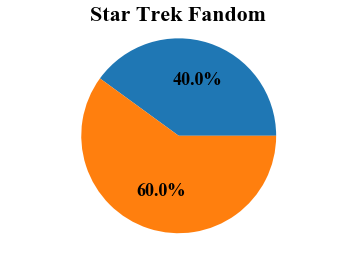

In [23]:
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == "Yes"]
non_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == "No"]

trekkies = star_wars[ star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
non_trekkies = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

fans_count = len(fans)
non_fans_count = len(non_fans)
fan_non_fan_counts = [fans_count, non_fans_count]
labels = ["Fans", "Non-Fans"]

wedges, texts, autotexts = plt.pie(
                            fan_non_fan_counts,
                            autopct='%1.1f%%'
                            )
plt.axis("equal")
plt.title("Star Wars Fandom",fontsize=22)
plt.legend(labels,fontsize=16)
plt.setp(autotexts, size=18)

plt.show()

trekkies_count = len(trekkies)
non_trekkies_count = len(non_trekkies)
trekkies_non_trekkies_counts = [trekkies_count, non_trekkies_count]
labels = ["Trekkiess", "Non-Trekkies"]

wedges, text, autotext = plt.pie(
                            trekkies_non_trekkies_counts,
                            autopct='%1.1f%%'
                            )

plt.axis("equal")
plt.title("Star Trek Fandom", fontsize=22)
plt.setp(autotext, size=18)

plt.show()

One thing to keep in mind is that these estimates of overall popularity are most likely overestimated. Because individuals with lower income levels were less likely to be fans of Star Trek and this demographic is underrepresented in the 538 survey. 